In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
plt.rcParams['figure.figsize']=(12,7)

dataset=pd.read_csv(r"C:\Users\vaishnavi.singh\Documents\DataSet\driver-data.csv")
print(dataset.head())

           id  mean_dist_day  mean_over_speed_perc
0  3423311935          71.24                    28
1  3423313212          52.53                    25
2  3423313724          64.54                    27
3  3423311373          55.69                    22
4  3423310999          54.58                    25


In [3]:
x=dataset.iloc[:,[1,2]].values

In [4]:
from sklearn.cluster import KMeans

# elbow method
wcss = []
for i in range(1,11):                                 #number of clusters
    kmeans = KMeans(n_clusters=i, init = "k-means++") #init-generates centroids in the dataset based on the density
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print (wcss)

[12184626.129627975, 1316420.8509477186, 992634.060670247, 719601.0859909916, 534665.2457891527, 372841.1452327002, 319740.6109206171, 276889.0643252953, 252669.34605011976, 230033.6591941254]


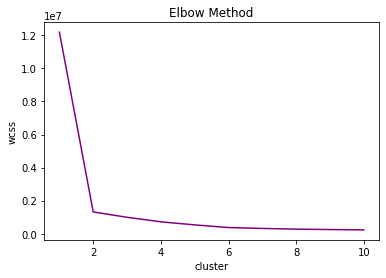

In [5]:
plt.plot(range(1,11),wcss,c="purple")
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(x)                        

In [8]:
# cluster center vectors
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [9]:
print (y_kmeans)
print (len(y_kmeans))

[0 0 0 ... 1 1 1]
4000


In [10]:
print (type(y_kmeans))
unique, counts = np.unique(y_kmeans,return_counts=True)
print (dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


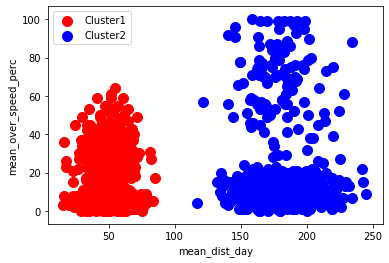

In [11]:

plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.legend()
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()

In [12]:
clust = pd.DataFrame(y_kmeans)

clust.columns = ['Cluster']
pd.concat([dataset,clust],axis=1) 

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [ ]:

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))   #creating dendrogram
plt.title('Dendrogram')
plt.xlabel('Drivers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')     #creating cluster
y_hc = hc.fit_predict(x)

In [15]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], c='red', s=100, label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], c='blue', s=100, label='Cluster2')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.legend()
plt.show()

NameError: name 'y_hc' is not defined